# Prétraitement des données

## Suppression des éléments indésirables de nos tweets

In [1]:
# Imports nécessaires
import pandas as pd
import numpy as np
import string 
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import math

In [9]:
# Lecture et stockage de la base de données
tweet_df = pd.read_csv('../../delphes/data/final2_clean.csv', index_col=0)
tweet_df.head()

,mep_id,name,country,group,nat_group,twitter,content
0,197490,Magdalena ADAMOWICZ,Poland,Group of the European People's Party (Christia...,Independent,Adamowicz_Magda,"['W tym dniu, w tym miejscu, w tej godzinie pr..."
1,189525,Asim ADEMOV,Bulgaria,Group of the European People's Party (Christia...,Citizens for European Development of Bulgaria,AdemovAsim,['RT @ECinBulgaria: 📢 Остана 1⃣ седмица! Преди...
2,124831,Isabella ADINOLFI,Italy,Non-attached Members,Movimento 5 Stelle,Isa_Adinolfi,"[""Sembra un film, ma purtroppo è realtà: le im..."
6,125045,Clara AGUILERA,Spain,Group of the Progressive Alliance of Socialist...,Partido Socialista Obrero Español,ClaraAguilera7,['RT @ClaraAguilera7: Debate e importantes vot...
7,204335,Alviina ALAMETSÄ,Finland,Group of the Greens/European Free Alliance,Vihreä liitto,alviinaalametsa,['Toimeentulotukea korotetaan 75e koronakriisi...


In [10]:
# Remove the undesirable elements in the entire dataframe
def rmurl_df(df, column_name):
    '''
    This function removes all the URLs, the #hashtag and the @user of a column made of strings.
    Be careful to apply it BEFORE all the other preprocessing steps (if not it wont'
    be recognized as a URL)
    '''
    df = df.copy()
    df[column_name] = df[column_name].str.replace('http\S+|www.\S+|@\S+|#\S+', '', case=False)
    return df



In [11]:
# Lowercase the tweet's column
def lower_df(df, column_name):
    '''
    This function lowercases a column made of strings.
    '''
    df = df.copy()
    df[column_name] = df[column_name].str.lower()
    return df

In [12]:
# Remove the numbers in the tweet's column
def rmnumbers_df(df, column_name):
    '''
    This function removes all the digits of a column made of strings.
    '''
    df = df.copy()
    def remove_numbers(text):
        return ''.join(word for word in text if not word.isdigit())
    df[column_name] = df[column_name].apply(remove_numbers)
    return df

In [13]:
# Remove the undesirable punctuations in the tweet's column
def rmpunct_df(df, column_name):
    '''
    This function removes all the punctuations, all the "rt" and remove multiple spaces
    of a column made of strings.
    '''
    punct = string.punctuation
    df = df.copy()
    def replace_punct(text):
        for punctu in punct:
            text = text.replace(punctu, ' ')
            text = text.replace(' rt ','')
            text = " ".join(text.split())
        return text
    df[column_name] = df[column_name].apply(replace_punct)
    return df

In [14]:
# Remove the undesirable emojis in the entire dataframe
def rmemojis_df(df):
    '''
    This function removes all the emojis of a column made of strings.
    Be careful to translate in latin alphabet before applying this function : 
    it also removes cyrillic alphabet
    '''
    df = df.copy()
    df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
    return df

In [15]:
clean_df = rmurl_df(tweet_df, 'content')
clean_df = lower_df(clean_df, 'content')
clean_df = rmnumbers_df(clean_df, 'content')
clean_df = rmpunct_df(clean_df, 'content')
clean_df = rmemojis_df(clean_df)

In [16]:
clean_df['country'].value_counts()

Germany        64
France         57
Italy          52
Spain          49
Poland         35
Netherlands    27
Portugal       16
Greece         16
Hungary        15
Sweden         14
Belgium        13
Czechia        11
Denmark        11
Romania        11
Ireland        10
Finland         9
Bulgaria        9
Croatia         8
Slovakia        8
Austria         8
Slovenia        6
Latvia          5
Malta           5
Estonia         4
Luxembourg      4
Lithuania       4
Cyprus          3
Name: country, dtype: int64

In [17]:
clean_df[clean_df['country'] == 'Hungary']

,mep_id,name,country,group,nat_group,twitter,content
78,124712,Andrea BOCSKOR,Hungary,Group of the European People's Party (Christia...,Fidesz-Magyar Polgri Szvetsg-Keresztnydemokrat...,AndreaBocskor,liberal majority of european parliament is bla...
145,197588,Katalin CSEH,Hungary,Renew Europe Group,Momentum,katka_cseh,students of the hungarian university of theate...
164,124714,Andor DELI,Hungary,Group of the European People's Party (Christia...,Fidesz-Magyar Polgri Szvetsg-Keresztnydemokrat...,andordeli,solidarity means common success but the questi...
170,96826,Tams DEUTSCH,Hungary,Group of the European People's Party (Christia...,Fidesz-Magyar Polgri Szvetsg-Keresztnydemokrat...,dajcstomi,thats it thats it thats it how hypocritical pl...
175,197595,Anna Jlia DONTH,Hungary,Renew Europe Group,Momentum,donath_anna,looking fwd to a very interesting talk tomorro...
268,198063,Mrton GYNGYSI,Hungary,Non-attached Members,Jobbik Magyarorszgrt Mozgalom,GyongyosiMarton,isn t this the kind of misdemeanor that phil h...
269,96830,Enik GYRI,Hungary,Group of the European People's Party (Christia...,Fidesz-Magyar Polgri Szvetsg-Keresztnydemokrat...,GyoriEniko,let us hope the does not miss that point bette...
288,124586,Balzs HIDVGHI,Hungary,Group of the European People's Party (Christia...,Fidesz-Magyar Polgri Szvetsg-Keresztnydemokrat...,BalazsHidveghi,great analysis of the hungarian pm by n the go...
293,124715,Gyrgy HLVNYI,Hungary,Group of the European People's Party (Christia...,Keresztnydemokrata Npprt,HolvenyiGyorgy,in todays meeting i expressed my concerns rega...
309,28141,Lvia JRKA,Hungary,Group of the European People's Party (Christia...,Fidesz-Magyar Polgri Szvetsg-Keresztnydemokrat...,JarokaLivia,all of my thoughts and prayers are with those ...


In [18]:
clean_df[clean_df['country'] == 'Ireland']

,mep_id,name,country,group,nat_group,twitter,content
136,124988,Deirdre CLUNE,Ireland,Group of the European People's Party (Christia...,Fine Gael Party,deirdreclunemep,the guidance on preparing for the end of the t...
146,197654,Ciarn CUFFE,Ireland,Group of the Greens/European Free Alliance,Green Party,ciarancuffe,it is crucial who follows phil hogan his repla...
208,197720,Frances FITZGERALD,Ireland,Group of the European People's Party (Christia...,Fine Gael Party,FitzgeraldFrncs,leaving london after talks w will continue th...
209,124985,Luke Ming FLANAGAN,Ireland,Group of the European United Left - Nordic Gre...,Independent,lukeming,the meat sector truly do not give a toss n nit...
335,96668,Sen KELLY,Ireland,Group of the European People's Party (Christia...,Fine Gael Party,SeanKellyMEP,eu member sates should reinstate the solvency ...
404,28115,Mairead McGUINNESS,Ireland,Group of the European People's Party (Christia...,Fine Gael Party,MaireadMcGMEP,happening this morning at am edt join us durin...
405,205452,Chris MACMANUS,Ireland,Group of the European United Left - Nordic Gre...,Sinn Fin,macmanuschris,the decision by electric ireland to hike its e...
478,197889,Grace O'SULLIVAN,Ireland,Group of the Greens/European Free Alliance,Green Party,graceosllvn,thought id bring a fresh new look to brussels ...
668,197817,Mick WALLACE,Ireland,Group of the European United Left - Nordic Gre...,Independents for change,wallacemick,there s huge frustration with lack of consiste...
669,197863,Maria WALSH,Ireland,Group of the European People's Party (Christia...,Fine Gael Party,mariawalsheu,congratulations lady amazing news great post ...


In [19]:
ireland = clean_df[clean_df['country'] == 'Ireland']

In [20]:
clean_df['content'][136]

'the guidance on preparing for the end of the transition period with sector specific information many irish importers and exporters rely on the uk as a key route a land bridge to and from eu says worried amp disappointed by the failure to engage on what he terms fair play or level playing field uk the withdrawal agreement is only way to protect good friday agreement in all its dimensions and therefore to protect t the public consultation is open until september th this is your chance to and give in the digital services act will be important in amp as i outlined today in my latest in by allowing the parochialism of irelands domestic politics to dominate its engagement in europ  farm to fork is a new eu strategy to protect biodiversity and reduce pesticides and food waste making europe s food very welcome news for pubs  n nwe are worried about the state of play of the negotiations with we do not see how we can have a better agree the eu is working continuously to find ways of ensuring a 

In [21]:
tweet_df['content'][136]

'[\'The @EU_Commission guidance on preparing for the end of the transition period, with sector specific information https://t.co/aHB3lwzQsx\', \'Many Irish importers and exporters rely on the UK as a key route, a land bridge to and from EU @MichelBarnier says… https://t.co/2SMROKEe7q\', \'.@MichelBarnier worried&amp;disappointed by the failure to engage on what he terms fair play or level playing field. UK… https://t.co/o3aScFy7lV\', \'RT @eurireland: The Withdrawal Agreement ... is only way to protect Good Friday Agreement in all its dimensions. And therefore to protect t…\', \'The @EU_Commission public consultation is open until September 8th, this is your chance to #haveyoursay and give in… https://t.co/ucDGV6DxVB\', \'The Digital Services Act will be important in #transport &amp; #tourism, as I outlined today in @EP_Transport… https://t.co/iZ874cgtGD\', \'RT @EoinDrea: My latest in @IrishTimesOpEd  By allowing the parochialism of Ireland’s domestic politics to dominate its engageme

In [22]:
testbase_df = clean_df[clean_df['country'] == 'Ireland']

## Premier test Word2Vec

In [23]:
testbase_df = testbase_df[['mep_id', 'content']]
for i in testbase_df["content"]:
    print(len(i))

26984
23580
28571
20068
25156
24608
30348
26530
28433
26214


In [24]:
from gensim.models import Word2Vec

In [25]:
sentences = list(testbase_df['content'])

In [26]:
sentences

['the guidance on preparing for the end of the transition period with sector specific information many irish importers and exporters rely on the uk as a key route a land bridge to and from eu says worried amp disappointed by the failure to engage on what he terms fair play or level playing field uk the withdrawal agreement is only way to protect good friday agreement in all its dimensions and therefore to protect t the public consultation is open until september th this is your chance to and give in the digital services act will be important in amp as i outlined today in my latest in by allowing the parochialism of irelands domestic politics to dominate its engagement in europ  farm to fork is a new eu strategy to protect biodiversity and reduce pesticides and food waste making europe s food very welcome news for pubs  n nwe are worried about the state of play of the negotiations with we do not see how we can have a better agree the eu is working continuously to find ways of ensuring a

In [27]:
sentences_train = []
for sentence in sentences:
    sentences_train.append(sentence.split())
print(sentences_train)

[['the', 'guidance', 'on', 'preparing', 'for', 'the', 'end', 'of', 'the', 'transition', 'period', 'with', 'sector', 'specific', 'information', 'many', 'irish', 'importers', 'and', 'exporters', 'rely', 'on', 'the', 'uk', 'as', 'a', 'key', 'route', 'a', 'land', 'bridge', 'to', 'and', 'from', 'eu', 'says', 'worried', 'amp', 'disappointed', 'by', 'the', 'failure', 'to', 'engage', 'on', 'what', 'he', 'terms', 'fair', 'play', 'or', 'level', 'playing', 'field', 'uk', 'the', 'withdrawal', 'agreement', 'is', 'only', 'way', 'to', 'protect', 'good', 'friday', 'agreement', 'in', 'all', 'its', 'dimensions', 'and', 'therefore', 'to', 'protect', 't', 'the', 'public', 'consultation', 'is', 'open', 'until', 'september', 'th', 'this', 'is', 'your', 'chance', 'to', 'and', 'give', 'in', 'the', 'digital', 'services', 'act', 'will', 'be', 'important', 'in', 'amp', 'as', 'i', 'outlined', 'today', 'in', 'my', 'latest', 'in', 'by', 'allowing', 'the', 'parochialism', 'of', 'irelands', 'domestic', 'politics', 't

In [28]:
word2vec_result = Word2Vec(sentences=sentences_train)

In [29]:
word2vec_result

# TF-IDF Approach

In [31]:
def word2vec_embedding(sentences,size,min_count):
    ### build word embedding for each reviews
    word2vec_model = Word2Vec(sentences, size=size, min_count=min_count)
    return word2vec_model

In [32]:
word2vec_embedding(sentences=sentences_train, size=100, min_count=1)

In [33]:
descriptorized_sentences = [' '.join(sentence) for sentence in sentences]
descriptorized_sentences

['t h e   g u i d a n c e   o n   p r e p a r i n g   f o r   t h e   e n d   o f   t h e   t r a n s i t i o n   p e r i o d   w i t h   s e c t o r   s p e c i f i c   i n f o r m a t i o n   m a n y   i r i s h   i m p o r t e r s   a n d   e x p o r t e r s   r e l y   o n   t h e   u k   a s   a   k e y   r o u t e   a   l a n d   b r i d g e   t o   a n d   f r o m   e u   s a y s   w o r r i e d   a m p   d i s a p p o i n t e d   b y   t h e   f a i l u r e   t o   e n g a g e   o n   w h a t   h e   t e r m s   f a i r   p l a y   o r   l e v e l   p l a y i n g   f i e l d   u k   t h e   w i t h d r a w a l   a g r e e m e n t   i s   o n l y   w a y   t o   p r o t e c t   g o o d   f r i d a y   a g r e e m e n t   i n   a l l   i t s   d i m e n s i o n s   a n d   t h e r e f o r e   t o   p r o t e c t   t   t h e   p u b l i c   c o n s u l t a t i o n   i s   o p e n   u n t i l   s e p t e m b e r   t h   t h i s   i s   y o u r   c h a n c e   t o   a n d   g i v e 

In [34]:
def tf_idf_vectorizer(sentences, word2vec_model):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit(sentences)
    dict_of_tfidf_weightings = dict(zip(X.get_feature_names(), X.idf_))
    sentence_vectors = []
    for stuff in sentences:
        weighted_review_terms = []
        words = stuff.split(' ')
        for word in words:
            if word in dict_of_tfidf_weightings.keys():
                tfidf_weighting = dict_of_tfidf_weightings[word]
                word_vector = word2vec_model.wv.get_vector(word).reshape(1, 100)
                weighted_word_vector = tfidf_weighting * word_vector
                weighted_review_terms.append(weighted_word_vector)
            else:
                continue
        try:
            review_vector = sum(weighted_review_terms)/len(weighted_review_terms)
        except:
            review_vector = []
        sentence_vectors.append(review_vector)
    result = np.array(sentence_vectors).reshape(-1,100)
    return result

In [35]:
result = tf_idf_vectorizer(sentences, word2vec_embedding(sentences=sentences_train, size=100, min_count=1))

In [218]:
df_result = pd.DataFrame(result)
df_result

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.606104,0.625254,0.008045,-0.033411,-0.584274,0.373779,0.064711,-0.343736,0.479158,0.264920,...,0.337297,0.055582,-0.059984,0.267404,0.671413,-0.115096,-0.488340,1.080315,0.182698,-0.067623
1,0.524814,0.541341,0.007031,-0.028771,-0.505938,0.323631,0.055949,-0.297596,0.415183,0.229714,...,0.292122,0.047937,-0.051833,0.231487,0.581157,-0.099614,-0.422886,0.935301,0.158035,-0.058151
2,0.582185,0.600661,0.007707,-0.031814,-0.561176,0.359083,0.062069,-0.329912,0.460403,0.254607,...,0.323909,0.053307,-0.057413,0.256798,0.644787,-0.110460,-0.468960,1.037555,0.175371,-0.064819
3,0.542884,0.560120,0.007424,-0.029697,-0.523655,0.335019,0.057978,-0.307616,0.429323,0.237420,...,0.302604,0.049403,-0.053561,0.239625,0.601824,-0.103114,-0.437535,0.967923,0.163193,-0.060678
4,0.568521,0.586701,0.007685,-0.031077,-0.547945,0.350470,0.060523,-0.322497,0.449591,0.248625,...,0.316489,0.052241,-0.056110,0.250700,0.629960,-0.107838,-0.458215,1.013656,0.171152,-0.063304
5,0.575642,0.593553,0.007550,-0.031619,-0.554553,0.355001,0.061491,-0.326346,0.455124,0.251671,...,0.319870,0.052590,-0.056832,0.253635,0.637207,-0.109258,-0.463846,1.025509,0.173547,-0.063980
6,0.544398,0.561751,0.007346,-0.029601,-0.524450,0.336048,0.057838,-0.308933,0.430016,0.237894,...,0.303235,0.049689,-0.053874,0.240143,0.602826,-0.103192,-0.438396,0.970065,0.164553,-0.059927
7,0.587677,0.606362,0.007856,-0.032343,-0.566658,0.362535,0.062521,-0.333304,0.464598,0.256997,...,0.327051,0.053712,-0.057994,0.259434,0.651027,-0.111610,-0.473537,1.047394,0.177070,-0.065374
8,0.566092,0.584050,0.007633,-0.030917,-0.545937,0.349420,0.060228,-0.320860,0.447523,0.247512,...,0.315168,0.051798,-0.055923,0.249937,0.627486,-0.107397,-0.456132,1.008912,0.170415,-0.063253
9,0.559985,0.577434,0.007470,-0.030631,-0.539757,0.345383,0.059853,-0.317487,0.442716,0.244750,...,0.311495,0.051509,-0.055353,0.246952,0.620143,-0.106307,-0.451028,0.997946,0.168516,-0.062469


## 3D Attempt

In [192]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px


## PCA Approach

In [220]:
df_result.shape

(10, 100)

In [453]:
pca = PCA(n_components=10)
pca_result = pca.fit_transform(df_result.values)
pca_result.shape

(10, 10)

In [451]:
dir(pca)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 'copy',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'n_components',
 'random_state',
 'score',
 'score_samples',
 'set_params',
 'svd_solver',
 'tol',
 'transform',
 'whiten']

In [456]:
pca.explained_variance_ratio_

array([6.63375655e-01, 3.14040200e-01, 2.25830047e-02, 1.12102735e-06,
       1.92910273e-08, 2.01074985e-12, 4.30075107e-13, 2.67814653e-13,
       2.05482922e-13, 3.07497142e-33])

In [109]:
df_result[0][1]

-0.72518563

##  TSNE approach

In [234]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=5000)
tsne_results = tsne.fit_transform(pca_result)
tsne_results

[t-SNE] Computing 9 nearest neighbors...
[t-SNE] Indexed 10 samples in 0.000s...
[t-SNE] Computed neighbors for 10 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 10 / 10
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.128632
[t-SNE] KL divergence after 5000 iterations: 0.244975


array([[ 518.5429  , -295.43317 ,  521.6096  ],
       [ 664.66223 ,  365.46088 ,  140.9021  ],
       [ 344.40463 ,  185.74748 , -559.51935 ],
       [-623.64734 ,  167.28778 ,  329.63556 ],
       [  35.765553,   10.847997,   99.7758  ],
       [-397.89703 , -467.4784  , -276.2511  ],
       [-408.79626 ,  277.05972 , -440.80963 ],
       [ -43.776833,  719.1368  ,  118.573685],
       [ 391.16812 , -534.7     , -247.11372 ],
       [-236.6057  , -512.3452  ,  510.49365 ]], dtype=float32)

In [236]:
pca_result = pd.DataFrame(pca_result)
pca_result

,0,1,2,3,4,5,6,7,8,9,x,y,z,part
0,-0.265103,0.000056,-0.000359,-0.000128,-0.000528,-0.000127,-0.000191,-0.000139,-0.000352,2.028256e-07,194.025345,-997.016602,-247.282669,1
1,0.269971,-0.000517,0.000711,-0.000382,-0.000261,0.000257,0.000100,-0.000080,-0.000317,2.028183e-07,-132.623032,637.773315,41.422520,0
2,-0.107409,-0.000133,0.000027,0.000073,0.000174,0.000642,-0.000216,0.000496,0.000022,2.028155e-07,100.177795,373.801666,71.450867,1
3,0.149786,-0.001288,-0.000641,0.000024,-0.000189,-0.000474,-0.000127,0.000383,0.000151,2.028370e-07,185.590637,68.384308,-60.150459,2
4,-0.018457,-0.000309,-0.000005,0.000898,0.000115,-0.000032,0.000466,-0.000024,-0.000203,2.028293e-07,11.791172,-377.908936,-64.687889,1
5,-0.062996,0.000517,0.001362,0.000097,0.000240,-0.000427,-0.000267,0.000042,0.000062,2.028321e-07,1067.539551,-260.638092,125.561264,1
6,0.141730,0.002639,-0.000604,-0.000016,0.000026,-0.000046,-0.000006,0.000050,-0.000011,2.028498e-07,-156.474823,-82.234650,-180.743073,3
7,-0.144235,0.000040,0.000123,-0.000588,-0.000030,-0.000038,0.000566,0.000052,0.000310,2.028627e-07,141.730148,-138.166245,234.744186,0
8,-0.002498,-0.000748,-0.000596,-0.000303,0.000743,-0.000023,-0.000124,-0.000331,-0.000124,2.028947e-07,-257.285278,213.924576,-7.376860,2
9,0.039212,-0.000258,-0.000019,0.000324,-0.000291,0.000267,-0.000199,-0.000449,0.000461,2.028691e-07,-752.706665,233.887253,-57.005329,1


In [413]:
x_coord = []
y_coord = []
z_coord = []
for i in tsne_results:
    x_coord.append(i[0])
    y_coord.append(i[1])
    z_coord.append(i[2])
pca_result["x"] = x_coord
pca_result["y"] = y_coord
pca_result["z"] = z_coord
pca_result["part"] = [1,0,1,2,1,1,2,0,2,4]

In [422]:
x_test = pca_result["x"][9]
y_test = pca_result["y"][9]
z_test = pca_result["z"][9]
distances = []

for i in range(0,9):
    x = pca_result["x"][i]
    y = pca_result["y"][i]
    z = pca_result["z"][i]
    distance = math.sqrt((x-x_test)**2+(y-y_test)**2+(z-z_test)**2)
    distances.append(distance)    

In [441]:
distances

[785.7632070731305,
 1311.2685955875286,
 1403.507833543667,
 802.7526958310898,
 718.7533558985613,
 804.3601369595831,
 1248.1136505408397,
 1306.6492013298746,
 984.158849509592]

In [439]:
ireland["name"].iloc[3:4]

136         Deirdre CLUNE
146           Ciarn CUFFE
208    Frances FITZGERALD
209    Luke Ming FLANAGAN
335             Sen KELLY
404    Mairead McGUINNESS
405        Chris MACMANUS
478      Grace O'SULLIVAN
668          Mick WALLACE
669           Maria WALSH
Name: name, dtype: object

In [442]:
ireland["name"].iloc[distances.index(min(distances)):distances.index(min(distances))+1]

335    Sen KELLY
Name: name, dtype: object

## Plotting

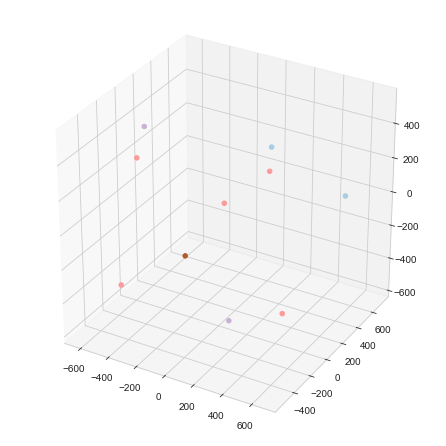

In [239]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig)

x = x_coord
y = y_coord
z = z_coord


g = ax.scatter(x, y, z, c=df_result["part"], marker='o', depthshade=False, cmap='Paired')

plt.show()

In [415]:
fig = px.scatter_3d(pca_result, x='x', y='y', z='z',
              color='part')
fig.show()

In [ ]:
for i in range 

## Testing the Model

In [ ]:
for i in pca_result

## Let's do this

### Preprocessing it

In [388]:

test = [0,"This morning Deputy Dara Calleary tendered his resignation as Minister for Agriculture, Food and the Marine, following his attendance at the Oireachtas golf dinner on Wednesday evening. His attendance at this event was wrong and an error of judgement on his part. I have accepted his resignation. People all over the country have made very difficult, personal sacrifices in their family lives and in their businesses to comply with COVID-19 regulations. This event should not have gone ahead in the manner it did given the Government decision of last Tuesday. Dara Calleary, since he was first elected to Dail Eireann has been, and remains, a committed and dedicated public representative. This error of judgement was out of character. He has made the right decision for the country, particularly in the light of our continued efforts to suppress COVID-19."]



In [389]:
test_df = pd.DataFrame(test)

In [390]:
test_df["words"] = test_df[0] 

In [391]:
test_df["words"]

0                                                    0
1    This morning Deputy Dara Calleary tendered his...
Name: words, dtype: object

In [392]:
test_df["words"][1]

'This morning Deputy Dara Calleary tendered his resignation as Minister for Agriculture, Food and the Marine, following his attendance at the Oireachtas golf dinner on Wednesday evening. His attendance at this event was wrong and an error of judgement on his part. I have accepted his resignation. People all over the country have made very difficult, personal sacrifices in their family lives and in their businesses to comply with COVID-19 regulations. This event should not have gone ahead in the manner it did given the Government decision of last Tuesday. Dara Calleary, since he was first elected to Dail Eireann has been, and remains, a committed and dedicated public representative. This error of judgement was out of character. He has made the right decision for the country, particularly in the light of our continued efforts to suppress COVID-19.'

In [393]:
test_df = lower_df(test_df, 'words')

In [394]:
punct = string.punctuation
def replace_punct(text):
        for punctu in punct:
            text = text.replace(punctu, ' ')
            text = text.replace(' rt ','')
            text = " ".join(text.split())
        return text

In [395]:
test_df = replace_punct(test_df["words"][1])

In [396]:
test_df = test_df.split()

### Embedding it

In [397]:
def tf_idf_vectorizer(sentences, word2vec_model):
    descriptorized_sentences = sentences
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit(descriptorized_sentences)
    dict_of_tfidf_weightings = dict(zip(X.get_feature_names(), X.idf_))
    sentence_vectors = []
    for stuff in descriptorized_sentences:
        weighted_review_terms = []
        words = stuff.split(' ')
        for word in words:
            if word in dict_of_tfidf_weightings.keys():
                tfidf_weighting = dict_of_tfidf_weightings[word]
                word_vector = word2vec_model.wv.get_vector(word).reshape(1, 100)
                weighted_word_vector = tfidf_weighting * word_vector
                weighted_review_terms.append(weighted_word_vector)
            else:
                continue
        try:
            review_vector = sum(weighted_review_terms)/len(weighted_review_terms)
        except:
            review_vector = []
        sentence_vectors.append(review_vector)
    result = sentence_vectors
    return result

In [399]:
test_result = tf_idf_vectorizer(test_df, word2vec_embedding(sentences=[test_df], size=100, min_count=1))

In [401]:
test_result = pd.DataFrame(test_result)
test_result

,0
0,"[[-0.0014080498, -0.0014323595, -0.0060102316,..."
1,"[[0.017568465, 0.019276556, -0.016697468, -0.0..."
2,"[[-0.009659771, -0.020748317, 0.012139493, -0...."
3,"[[0.01090145, 0.013030089, -6.837486e-05, -0.0..."
4,"[[-0.0061797644, 0.0145727545, 0.008796777, 0...."
5,"[[0.013119994, -0.01037089, -0.019188588, -0.0..."
6,"[[0.0062928265, -0.013698477, -0.0059824465, 0..."
7,"[[-0.0012519717, -0.009741837, 0.021593273, -0..."
8,"[[0.008566917, 0.020694774, -0.0064549856, 0.0..."
9,"[[-0.012378502, -0.008165955, 0.01969572, 0.01..."


In [403]:
del(test_result[0][42])

In [404]:
for i in range (0,140): 
    test_result[0][i] = test_result[0][i][0]

KeyError: 42

## Pierre Stuff

In [25]:
def embed_sentence(word2vec, sentence):
    y = []
    for word in sentence:
        if word in word2vec.wv.vocab.keys():
           y.append(word2vec[word])
    return np.array(y)

def embedding(word2vec, sentences):
    
    y = []
    for sentence in sentences:
        y.append(embed_sentence(word2vec, sentence))
    return y

In [26]:
X_train = embedding(word2vec,sentences_train)

/Users/simonpastor/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [27]:
from tensorflow.keras.utils import to_categorical
y_train = np.arange(0,10,1)
y_cat_train = to_categorical(y_train, num_classes=10)

In [327]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

def init_model():

    model = Sequential()
    model.add(layers.Masking(mask_value = -1000))
    model.add(layers.LSTM(13))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', 
              metrics=['accuracy'])
    return model

model = init_model()

In [328]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train_pad = pad_sequences(X_train, padding='post',value=-1000, dtype='float32')

In [329]:
X_train_pad.shape

(10, 4274, 100)

In [330]:
model = init_model()
model.fit(X_train_pad, y_cat_train, batch_size=4,epochs=10)

Train on 10 samples
Epoch 1/10
10/10 [==============================] - 8s 797ms/sample - loss: 1.1921e-07 - acc: 0.1000
Epoch 2/10
10/10 [==============================] - 7s 684ms/sample - loss: 1.1921e-07 - acc: 0.1000
Epoch 3/10
10/10 [==============================] - 7s 695ms/sample - loss: 1.1921e-07 - acc: 0.1000
Epoch 4/10
10/10 [==============================] - 7s 683ms/sample - loss: 1.1921e-07 - acc: 0.1000
Epoch 5/10
10/10 [==============================] - 7s 708ms/sample - loss: 1.1921e-07 - acc: 0.1000
Epoch 6/10
10/10 [==============================] - 7s 695ms/sample - loss: 1.1921e-07 - acc: 0.1000
Epoch 7/10
10/10 [==============================] - 7s 689ms/sample - loss: 1.1921e-07 - acc: 0.1000
Epoch 8/10
10/10 [==============================] - 7s 680ms/sample - loss: 1.1921e-07 - acc: 0.1000
Epoch 9/10
10/10 [==============================] - 7s 704ms/sample - loss: 1.1921e-07 - acc: 0.1000
Epoch 10/10
10/10 [==============================] - 7s 695ms/sample - 

In [320]:
examples2 = ['I am convinced that simon is quite annoying because his father come from catholic an awful latin country thought irish',
           'I am convinced that simon is quite annoying because his father come from catholic an awful latin country thought irish',
            'hello to all and the youtube game immigration because']

In [321]:
examples=[]
for example in examples2:
    examples.append(example.split())

In [326]:
examples[0]

['I',
 'am',
 'convinced',
 'that',
 'simon',
 'is',
 'quite',
 'annoying',
 'because',
 'his',
 'father',
 'come',
 'from',
 'catholic',
 'an',
 'awful',
 'latin',
 'country',
 'thought',
 'irish']

In [322]:
X_test = embedding(word2vec, examples)
X_test_pad = pad_sequences(X_test, padding='post',value=-1000, dtype='float32')

c:\users\psmag\.venvs\delphes\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [323]:
X_test_pad.shape

(3, 12, 100)

In [325]:
model.predict(X_train_pad)

array([[0.16163039],
       [0.11579049],
       [0.09656599],
       [0.15933707],
       [0.11613584],
       [0.10138938],
       [0.0954535 ],
       [0.16251722],
       [0.13106443],
       [0.12658095]], dtype=float32)